<a href="https://colab.research.google.com/github/HarshalRaut16/deep_learning_evaluation/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 1 🧑🏽‍💻

Fit your model to this equation (30 Points)

> y = 4*(x^3) + 2*x + 150

* use Tensorflow as Deep learning Library 🧾
* Try to minimize size of the model 💪🏽

In [ ]:
#import all essential libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create x values
np_x = tf.range(0, 500, 1)

In [ ]:
# create y value
np_y = 4*(np_x**3) + 2*np_x + 150

In [ ]:
# Convert into tensor
x = tf.convert_to_tensor(np_x)
y = tf.convert_to_tensor(np_y)

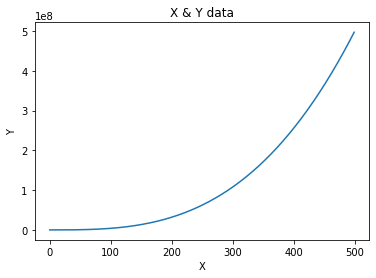

In [ ]:
# plot x and y value to check data 
plt.plot(x, y)
plt.xlabel("X")  # add X-axis label
plt.ylabel("Y")  # add Y-axis label
plt.title("X & Y data")  # add title
plt.show();

In [ ]:
# Split data into train and test sets
X_train = x[:400] # (80% of data)
y_train = y[:400]

X_test = x[400:] #  (20% of data)
y_test = y[400:]

len(X_train), len(X_test), len(y_train), len(y_test)

(400, 100, 400, 100)

In [ ]:
# Normalized Train Data
x_train_norm = X_train/max(x)
y_train_norm = y_train/max(y)

In [ ]:
# Normalized Test Data
x_test_norm = X_test/max(x)
y_test_norm = y_test/max(y)

In [ ]:
# Assigning Max of x & y to variables beacause we need to get original data back by multiplying
max_x = np.max(x)
max_y = np.max(y)

## Creating Base Model

In [ ]:
# base model
tf.random.set_seed(42)

# Create the model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# Compile the model
model_0.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit the model
model_0.fit(tf.expand_dims(x_train_norm,axis=-1),y_train_norm, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1632 - mae: 0.1632
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0662 - mae: 0.0662
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0600 - mae: 0.0600
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0540 - mae: 0.0540
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - mae: 0.0524
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0513 - mae: 0.0513
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0501 - mae: 0.0501
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - mae: 0.0495
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0493 - mae: 0.0493
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0487 - mae: 0.0487
Epoch 11/100
13/13 [==============================] - 0s 2m

In [ ]:
# evaluate model using normal data
model_0.evaluate(X_train,y_train)

13/13 [==============================] - 0s 2ms/step - loss: 63680844.0000 - mae: 63680844.0000


[63680844.0, 63680844.0]

In [ ]:
# evaluate model using normalized data
model_0.evaluate(x_test_norm,y_test_norm)

4/4 [==============================] - 0s 3ms/step - loss: 0.3658 - mae: 0.3658


[0.3658042252063751, 0.3658042252063751]

In [ ]:
# get predicted values
y_preds_norm_0 = model_0.predict(x_test_norm)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# multiply data by max values to get original data
y_preds_0 = tf.math.multiply(y_preds_norm_0,max_y)

In [ ]:
# function for plot a graph of preduction

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds_0):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.plot(train_data, train_labels, c="r", label="Training data")
  # Plot test data in green
  plt.plot(test_data, test_labels, c="b", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.plot(test_data, predictions, c="y", label="Predictions",linestyle="--")
  # Show the legend
  plt.legend();
     

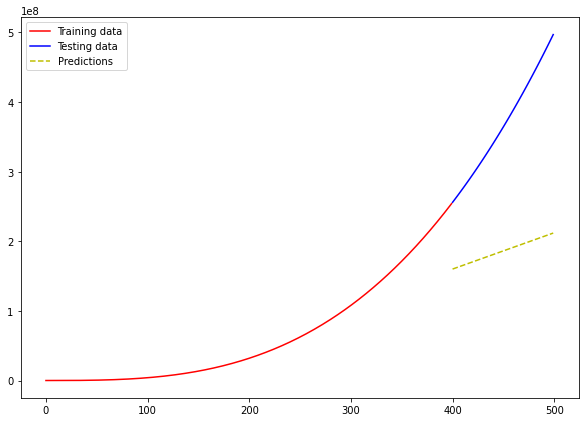

In [ ]:
# plot graph of prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_0)

## Model 1 (Improve model)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=[1]),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
],name="model_1")

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(x_train_norm,axis=-1),y_train_norm, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 2ms/step - loss: 0.0882 - mae: 0.0882
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0370 - mae: 0.0370
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0228 - mae: 0.0228
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0133
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0084 - mae: 0.0084
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0068
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - mae: 0.0061
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0069 - mae: 0.0069
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0085 - mae: 0.0085
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - mae: 0.0045
Epoch 11/500
13/13 [==============================] - 0s 2m

In [ ]:
y_preds_normalized_1 = model_1.predict(x_test_norm)
y_preds_1 = tf.math.multiply(y_preds_normalized_1,max_y)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# evaluate model using normalized data
model_1.evaluate(x_test_norm,y_test_norm)

4/4 [==============================] - 0s 4ms/step - loss: 0.0529 - mae: 0.0529


[0.05291051045060158, 0.05291051045060158]

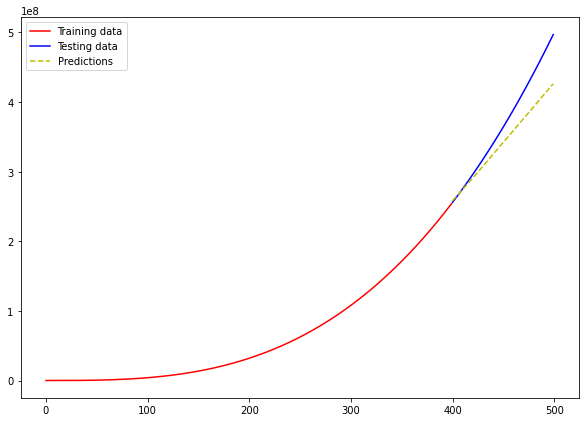

In [ ]:
# plot graph
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_1)

## Model 2

In [ ]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='gelu',input_shape=[1]), # using gelu activation function (https://www.tensorflow.org/api_docs/python/tf/keras/activations/gelu)
    tf.keras.layers.Dense(10,activation='gelu'),
    tf.keras.layers.Dense(1,activation='linear'),
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(x_train_norm,axis=-1),y_train_norm, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 0.1043 - mae: 0.1043
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0798 - mae: 0.0798
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0576 - mae: 0.0576
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0482 - mae: 0.0482
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0460 - mae: 0.0460
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0454 - mae: 0.0454
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0441 - mae: 0.0441
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - mae: 0.0437
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0431 - mae: 0.0431
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0419 - mae: 0.0419
Epoch 11/500
13/13 [==============================] - 0s 2m

In [ ]:
y_preds_norm_2 = model_2.predict(x_test_norm)
y_preds_2 = tf.math.multiply(y_preds_norm_2,max_y)

4/4 [==============================] - 0s 3ms/step


In [ ]:
model_2.evaluate(x_test_norm,y_test_norm)

4/4 [==============================] - 0s 4ms/step - loss: 0.0137 - mae: 0.0137


[0.01367177814245224, 0.01367177814245224]

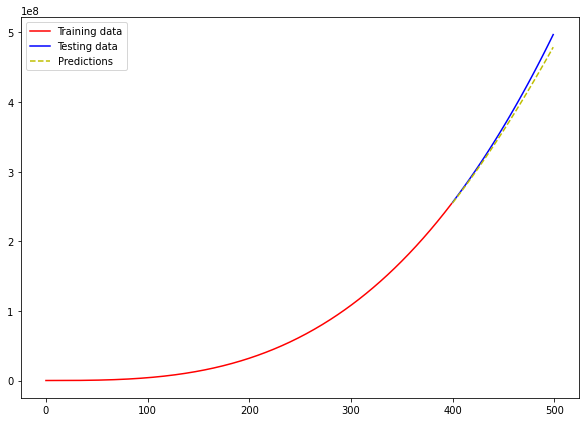

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_2)